<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Grover

In [1]:
# initialisation
import cmath
import math

import numpy as np
from loguru import logger

# Importing standard Qiskit libraries
from qiskit import (
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    transpile,
)

# basic plot tools
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit.quantum_info import Operator

# Loading your IBM Quantum account(s)
provider = IBMProvider()

backend = Aer.get_backend("aer_simulator")

#### EJERCICIO

Crea las siguientes funciones auxiliares:

- __get_probabilities__: que tome como entrada un vector de estados y devuelva las probabilidades de todos sus compoentes
- __get__phases__: que tome como entrada un vector de estados y devuelva las fases de todos sus compoentes
- __svector_viz__: que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades, las fases de cada componente del vector  y la visualizacion de plot_bloch_multivector

In [2]:
from custom_utils import get_probabilities, get_phases, count_to_digital_values

## Oraculo

Para construir el oráculo vamos a ver primero cual es la matriz unitaria $U$ da este circuito, porque va a ser muy sencilla de crear. Esto nos ayudará a crear un oráculo de una forma mucho mas sencilla que con todas las puertas.

### EJERCICIO

Construye en el composer el circuito 3 qubits del oraculo del algoritmo de Grover para el estado |000>.
Ejecutalo en el simulador y obten la matriz unitaria del circuito

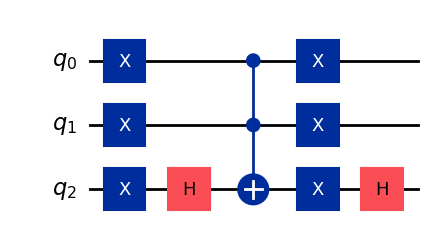

In [3]:
n=2
circuit = QuantumCircuit(n+1)

circuit.x(range(n+1))
circuit.h(n)
circuit.ccx(*range(n), n)
circuit.x(range(n+1))
circuit.h(n)

circuit.draw('mpl', style='iqp')

In [4]:
circuit.save_unitary()

result = backend.run(circuit).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary.to_matrix())

Circuit unitary:
 [[ 0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j -2.22044605e-16-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  -2.22044605e-16-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j -2.22044605e-16-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0

### EJERCICIO

Construye en el composer el circuito 3 qubits del oraculo del algoritmo de Grover para el estado |111>.
Ejecutalo en el simulador y obten la matriz unitaria del circuito

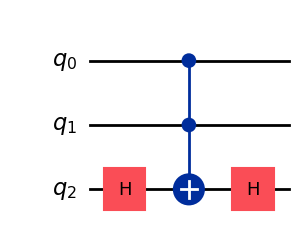

In [5]:
n=2
circuit = QuantumCircuit(n+1)

circuit.h(n)
circuit.ccx(*range(n), n)
circuit.h(n)

circuit.draw('mpl', style='iqp')

In [6]:
circuit.save_unitary()

result = backend.run(circuit).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary.to_matrix())

Circuit unitary:
 [[ 1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0

#### EJERCICIO

Contruimos el oráculo con una funcion __phase_oracle__ donde codificamos el estado que representa la cadena que queremos buscar con fase $\pi$.

En este caso, construir el circuito con puertas elementales es algo complicado pero construirlo a partir de la matriz $U$ que representa el circuito es muy sencillo. Pensemos que esta matriz $U$ sería como la matriz identidad salvo que en la fila del estado que estamos buscando ponemos un -1 o sea, le cambiamos la fase a $\pi$.

La funcion que construye el oráculo de fase debe de devolver el circuito que se crea a aprtir de esta matriz unitaria

In [41]:
def phase_oracle(n, indices_to_mark, name="Oracle"):
    # n num qubits del circuito
    # indices_to_mark lista de indices de la diagonal que marcamos a -1 (podemos marcar mas de un indice para la busqueda)
    matrix = np.identity(2**n)
    logger.debug(f"Identity:\n{matrix}")

    for index in indices_to_mark:
        matrix[index, index]=-1 
    logger.debug(f"U matrix:\n{matrix}")

    qc = QuantumCircuit(n, name=name)
    U = Operator(matrix)
    qc.unitary(U, range(n))

    return qc

#### EJERCICIO

Probamos el oráculo:
- input estado $|0000...0>$ que en notacion matricial es $[1,0,0,0,...0]$ y el indice a marcar es 0
- la salida es el mismo estado pero con un cambio de fase, en el estado que hemos marcado pone una fase de $\pi$

Utiliza la funcion auxiliar __svector_viz__ para comprobar el estado resultado de ejecucion del Oráculo

2024-02-23 23:31:11.698 | DEBUG    | __main__:phase_oracle:5 - Identity:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
2024-02-23 23:31:11.701 | DEBUG    | __main__:phase_oracle:9 - U matrix:
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


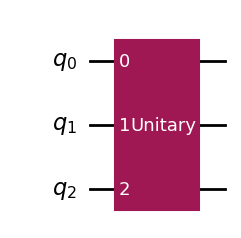

In [42]:
n=3
oracle=phase_oracle(n, [0])

#Mostrar el circuito y vector de estados 
oracle.draw('mpl', style='iqp')

## Algoritmo de Grover

El algoritmo de Grover se compone de la iteracion de tres partes:
- Parte 1, un bloque de puertas de Hadamard, que pone todos los qubits de entrada en superposicion
- Parte 2, el oráculo
- Parte 3, un bloque de difusion que pone las amplitudes de los estados a un nivel promediado entre todos

Las partes 2 y 3 se repiten a conveniencia para conseguir una mayor probabilidad en el estado buscado, en torno a $\sqrt n$ veces.

Es importante observar que el bloque de difusion, es simplemente el oráculo de fases con el primer estado marcado. De esta forma podemos construir el algoritmo de una forma muy sencilla con la ayuda de dos funciones __difuser__ y __grover__

#### EJERCICIO

Ya hemos creado la funcion __phase_oracle__ que crea el Oráculo del algoritmo.

Ahora creamos la funcion __difusser__ que implementa un circuito difussor que realiza la Amplificacion de Amplitud. Recordar que podemos implementarla de forma sencilla a partir de la funcion __phase_oracle__

Finalmente crearemos la funcion __grover__ que implementará el circuito del algoritmo de Grover (puertas H+ r veces (oráculo + difusor)). 

Donde el numero de veces $r$ que debemos de iterar el ciruito viene dado en el codigo


In [43]:
def diffuser(n):
    #crea un circuito
    _circuit = QuantumCircuit(n, name= "Diffuser")
    #añade h
    _circuit.h(range(n))
    _circuit.barrier()

    #append el oraculo que marca el estado |000..>
    _circuit= _circuit.compose(phase_oracle(n, [0]))
    _circuit.barrier()
    
    #añade h
    _circuit.h(range(n))
    
    return _circuit

def grover(n, marked):
    #crear el QuantumCircuit
    _circuit = QuantumCircuit(n)
    # calculamos el numero optimo de veces que debemos repetir la ejecucion de las partes 2 y 3
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n))) - 1/2))
    print(f'Para {n} qubits, donde hemos marcado el estado de la base {marked}, hacemos {r} iteraciones')
    #ponemos h
    _circuit.h(range(n))
    _circuit.barrier()

    #append r veces el oráculo y el difusor
    for _ in range(r):
        _circuit= _circuit.compose(phase_oracle(n, marked), wrap=True)
        _circuit.barrier()
        _circuit= _circuit.compose(diffuser(n), wrap=True)
        _circuit.barrier()

    #añadimos una capa de medidas
    _circuit.measure_all()

    return _circuit

### Ejecucion del Algoritmo de Grover en el simulator

#### EJERCICIO

Para un numero dado de qubits $n$, genera un numero aleatorio del total posible $N=2^n$

Ejecutar el algoritmo de Grover con el Oráculo preparado para el numero anterior generado aleatoriamente, el numero de iteraciones optima

Ejecutalo en el simulador y pon un numero alto de shots (10000, por ejemplo para dar alguna posibilidad de que aparezcan las amplitudes de otros estados no buscados)

2024-02-23 23:33:34.547 | DEBUG    | __main__:phase_oracle:5 - Identity:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
2024-02-23 23:33:34.550 | DEBUG    | __main__:phase_oracle:9 - U matrix:
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.

4
[4]
Para 4 qubits, donde hemos marcado el estado de la base [4], hacemos 3 iteraciones


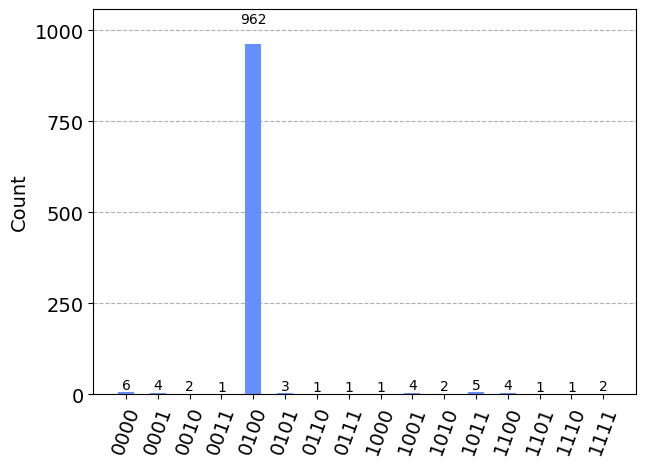

In [50]:
import random
n = 4

x = random.randint(0, 2**n)
print(x)
marked = [x]
print(marked)
circuit = grover(n, marked)

circuit.draw('mpl', style='iqp')

t_circuit = transpile(circuit, backend)
result = backend.run(t_circuit, shots=1000).result()

plot_histogram(result.get_counts())

#### EJERCICIO

Vamos a ver la ejecucion del algoritmo iteracion a iteracion

Para ello ejecutamos el algoritmo de Grover y en cada ejecucion guardamos el resultado de la simulacion para representarlas todas de forma conjunta con la funcion __plot_histogram__ y ver la ganancia de Amplificacion de Amplitud en cada ejecucion

In [ ]:
r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
print(f'Para {n} qubits, donde hemos marcado el estado de la base {marked}-> ejecucion optima {r}')

#recogeremos en una lista todas las ejecuciones para representarlas posteriormente con plot_histogram todas a la vez
counts = []






Los resultados para todas las iteraciones en el mismo histograma

In [ ]:
plot_histogram(counts, bar_labels=False,figsize=(20,8))

#### EJERCICIO

Podemos tambien verificar que pasa si nos pasamos de ejecutarlo mas veces del numero de veces optimo

Ejecutar el algoritmo de Grover para n=4 qubits una vez más de lo optimo y ver que perdemos probabilidad de encontrar la cadena buscada:

In [ ]:
n = 4
x = #generar num aleatorio
print(x)
marked = [x]
print(marked)



#### EJERCICIO

Podemos ver que ocurre si marcamos para la busqueda mas de un elemento

Para un numero dado de qubits $n$, genera dos numerso aleatorio del total posible $N=2^n$

Ejecutar el algoritmo de Grover con el Oráculo preparado para estos numeros  aleatorios, el numero de iteraciones optima

Ejecutalo en el simulador y pon un numero alto de shots (10000, por ejemplo para dar alguna posibilidad de que aparezcan las amplitudes de otros estados no buscados)

In [ ]:
n = 4
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y == x:
    y = np.random.randint(2**n)
    
marked = [x, y]

print(marked)



## Ejecucion en un simulador con ruido

#### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Grover, para ello:

- Tomamos n=3 qubits y generamos un numero aleatorio que vamos a buscar para construir nuestro oráculo
- Creamos el circuito cuántico, que llamamos <b>grover_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulado

In [ ]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import Aer, AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.fake_provider import FakeVigo

In [ ]:
#Construir el circuito
n = 3
x = 

Comparamos como el ruido afecta a los resultados y que a pesar del ruido podemos encontrar el estado que buscábamos.

## Ejecucion en un BackEnd cuántico

#### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Grover, para ello:

- Tomamos n=3 qubits y generamos un numero aleatorio que vamos a buscar para construir nuestro oráculo
- Creamos el circuito cuántico, que llamamos <b>grover_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

In [ ]:
n = 3
x = 

En el ordenador cuántico real, comprobamos si a pesar del ruido podemos encontrar los estados que buscábamos.